In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
movies = Table().read_table("top_movies.csv")
movies

Title,Studio,Gross,Gross (Adjusted),Year
Star Wars: The Force Awakens,Buena Vista (Disney),906723418,906723400,2015
Avatar,Fox,760507625,846120800,2009
Titanic,Paramount,658672302,1178627900,1997
Jurassic World,Universal,652270625,687728000,2015
Marvel's The Avengers,Buena Vista (Disney),623357910,668866600,2012
The Dark Knight,Warner Bros.,534858444,647761600,2008
Star Wars: Episode I - The Phantom Menace,Fox,474544677,785715000,1999
Star Wars,Fox,460998007,1549640500,1977
Avengers: Age of Ultron,Buena Vista (Disney),459005868,465684200,2015
The Dark Knight Rises,Warner Bros.,448139099,500961700,2012


In [3]:
movies_gross = movies.select("Title").with_column("Gross", np.round(movies.column("Gross (Adjusted)") / 1_000_000, 1))
movies_gross

Title,Gross
Star Wars: The Force Awakens,906.7
Avatar,846.1
Titanic,1178.6
Jurassic World,687.7
Marvel's The Avengers,668.9
The Dark Knight,647.8
Star Wars: Episode I - The Phantom Menace,785.7
Star Wars,1549.6
Avengers: Age of Ultron,465.7
The Dark Knight Rises,501


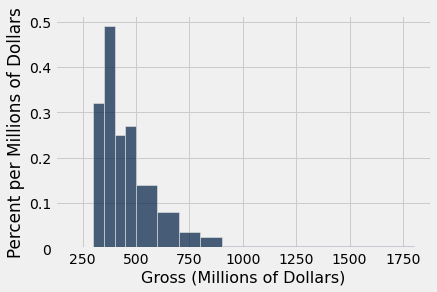

In [4]:
movies_gross.hist("Gross", bins=make_array(200, 250, 300, 350, 400, 450, 500, 600, 700, 800, 900, 1800.0), unit="Millions of Dollars", normed=True)

# Multi-variable Scatter Chart Examples

This uses the Galton data set.

In [5]:
galton = Table().read_table("galton_subset.csv")
galton

father,mother,son
78.5,67,73.2
75.5,66.5,73.5
75,64,71
75,64,70.5
75,58.5,72
74,68,76.5
74,62,74
73,67,71
73,67,68
73,66.5,71


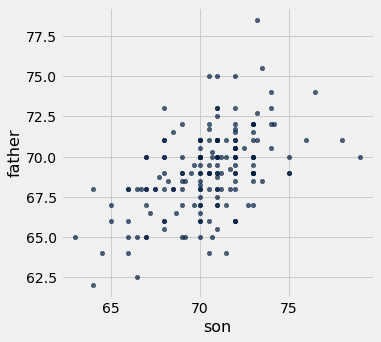

In [6]:
galton.scatter("son", ["father"])

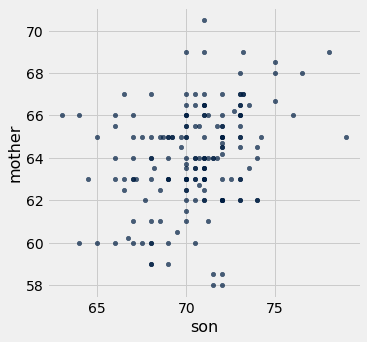

In [7]:
galton.scatter("son", ["mother"])

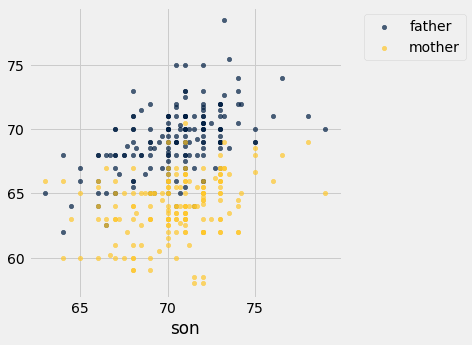

In [37]:
galton.scatter("son")

# Multi-variables line chart

This uses our population data in a line chart.

In [8]:
population = Table().read_table("pop_subset.csv")
population

AGE,2010,2014
0,3951330,3949775
1,3957888,3949776
2,4090862,3959664
3,4111920,4007079
4,4077551,4005716
5,4064653,4006900
6,4073013,4135930
7,4043046,4155326
8,4025604,4120903
9,4125415,4108349


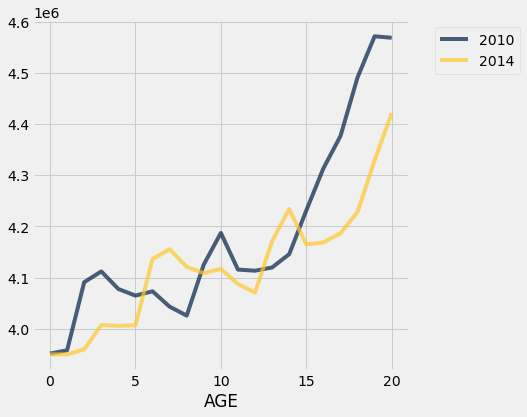

In [9]:
population.plot("AGE")

In [10]:
ca_data = Table().read_table("usa_ca_2014.csv")
ca_data

Ethnicity,USA All,CA All,USA Children,CA Children
Black,0.12,0.05,0.14,0.05
Hispanic,0.18,0.38,0.24,0.5
White,0.62,0.39,0.52,0.29
Other,0.08,0.18,0.1,0.16


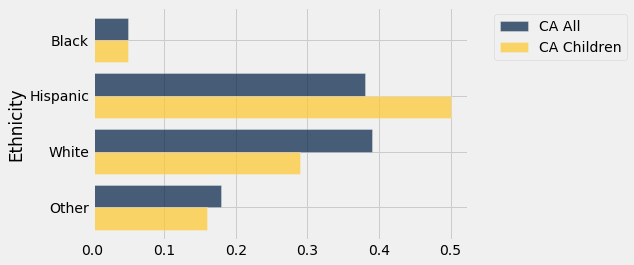

In [31]:
ca_data.barh("Ethnicity", ["CA All", "CA Children"])

In [11]:
gnuplot_vs_matplotlib = Table().read_table("multiTimeline.csv")
gnuplot_vs_matplotlib

Month,gnuplot,matplotlib
2004-01,65,4
2004-02,90,0
2004-03,64,7
2004-04,91,7
2004-05,68,3
2004-06,86,3
2004-07,86,4
2004-08,60,6
2004-09,77,6
2004-10,100,4


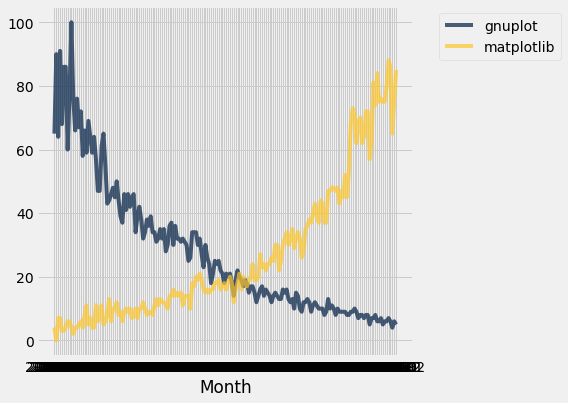

In [12]:
gnuplot_vs_matplotlib.plot("Month")